<a href="https://colab.research.google.com/github/mrturizo/mrturizo-machine-learning-miniprojects/blob/_principal_/Arritmias_v1_PROYECTO_ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias Necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError


import os
import gzip

import warnings; warnings.simplefilter('ignore')
import keras
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

# Lectura Cardiac Arrhythmia Database Dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta donde se encuentran los datos en Drive
path_datos = "/content/drive/MyDrive/Datasets_IA_FIA"

In [ ]:
# Construir el dataset entrenamiento
df_tr = pd.read_csv(path_datos+"/mitbih_train.csv",header=None)
df_tr

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Construir el dataset validación
df_v = pd.read_csv(path_datos+"/mitbih_test.csv",header=None)
df_v

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
# Dimensiones entrenamiento y validación
train_df=df_tr
test_df=df_v
print(train_df.shape)
print(test_df.shape)


(87554, 188)
(21892, 188)


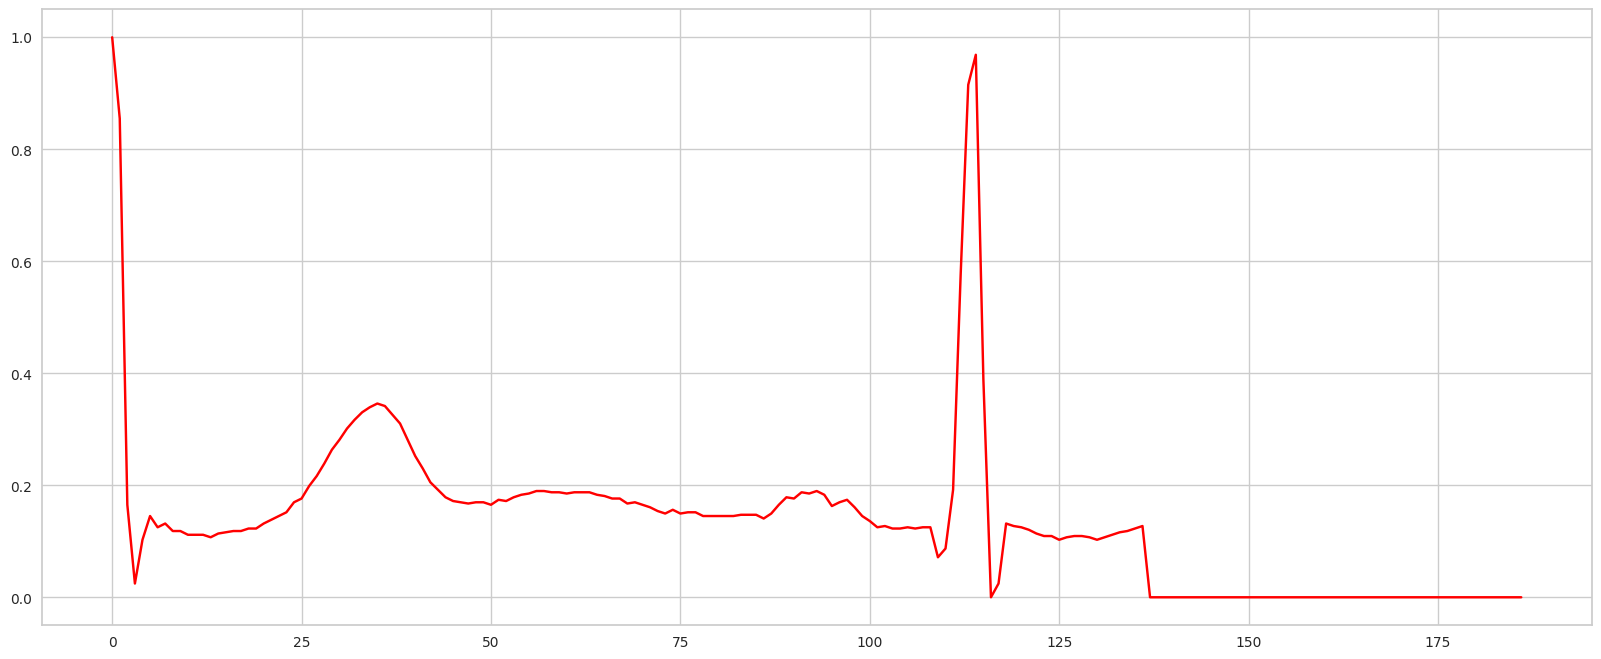

In [ ]:
# mostrar primera fila (muestra 1 del ekg)
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_df.iloc[475, 0:187], color = 'red')
plt.show()

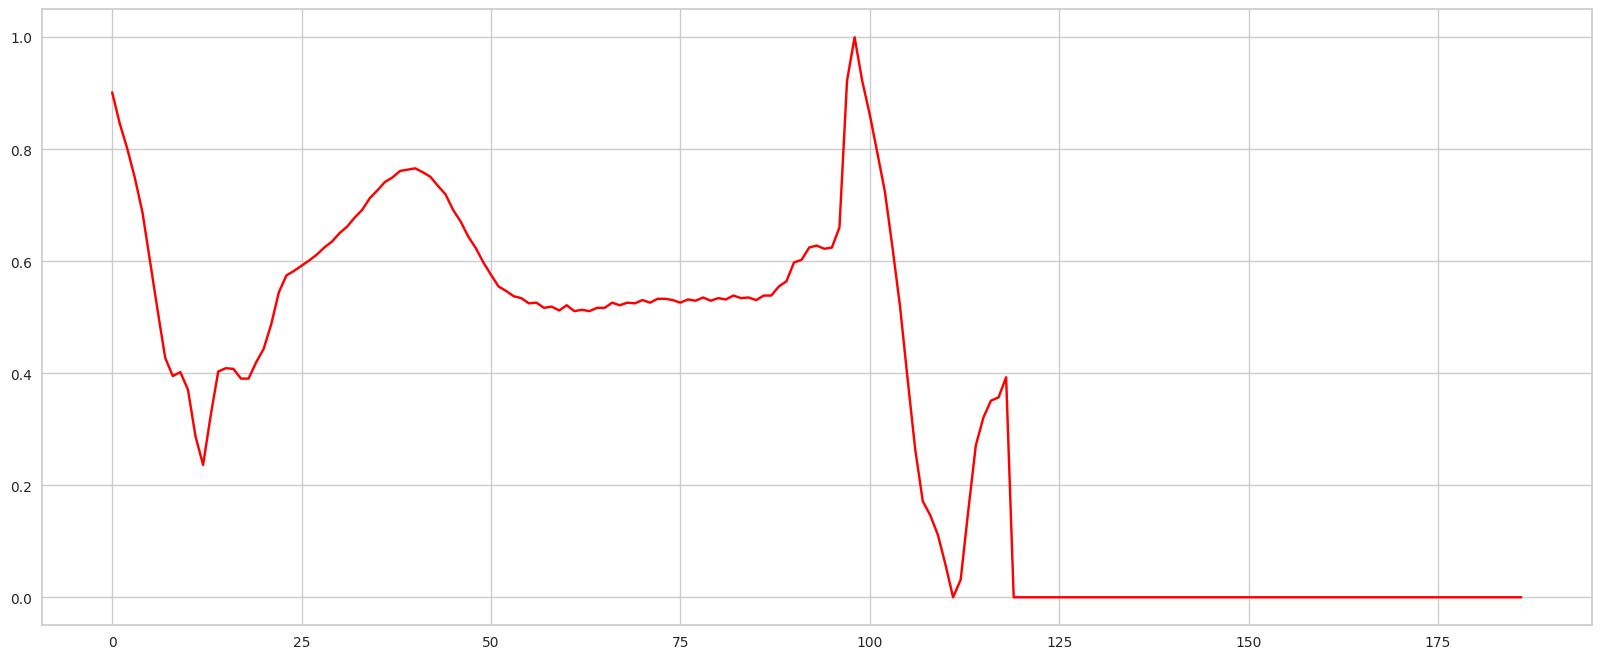

In [ ]:
# mostrar última fila (muestra 87554 del ekg)
sns.set_style('whitegrid')
plt.figure(figsize = (20,8))
plt.plot(train_df.iloc[87553, 0:187], color = 'red')
plt.show()

#Exploración de Variables (EDA)

In [ ]:
#Agrupamos por ritmos normales y arritmia 
ritmo_n = train_df[train_df[187] == 0]
ritmo_s = train_df[train_df[187] == 1]
ritmo_v = train_df[train_df[187] == 2]
ritmo_f = train_df[train_df[187] == 3]
ritmo_q = train_df[train_df[187] == 4]

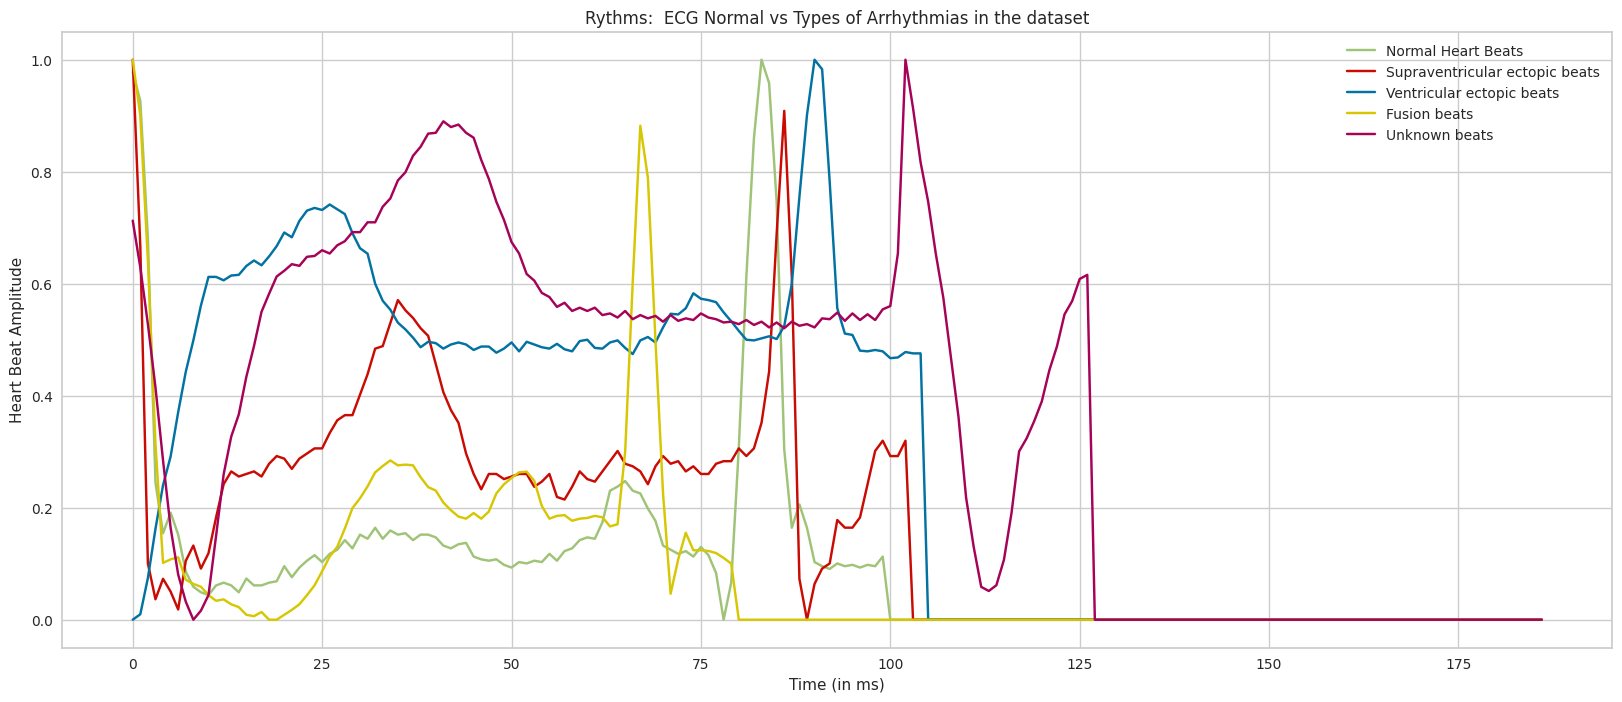

In [ ]:
#graficamos el primer ejemplo de cada tipo de ritmo
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(ritmo_n.iloc[0, 0:187], color = 'g', label = 'Normal Heart Beats')
plt.plot(ritmo_s.iloc[0, 0:187], color = 'r', label = 'Supraventricular ectopic beats')
plt.plot(ritmo_v.iloc[0, 0:187], color = 'b', label = 'Ventricular ectopic beats')
plt.plot(ritmo_f.iloc[0, 0:187], color = 'y', label = 'Fusion beats')
plt.plot(ritmo_q.iloc[0, 0:187], color = 'm', label = 'Unknown beats')


plt.title("Rythms:  ECG Normal vs Types of Arrhythmias in the dataset", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

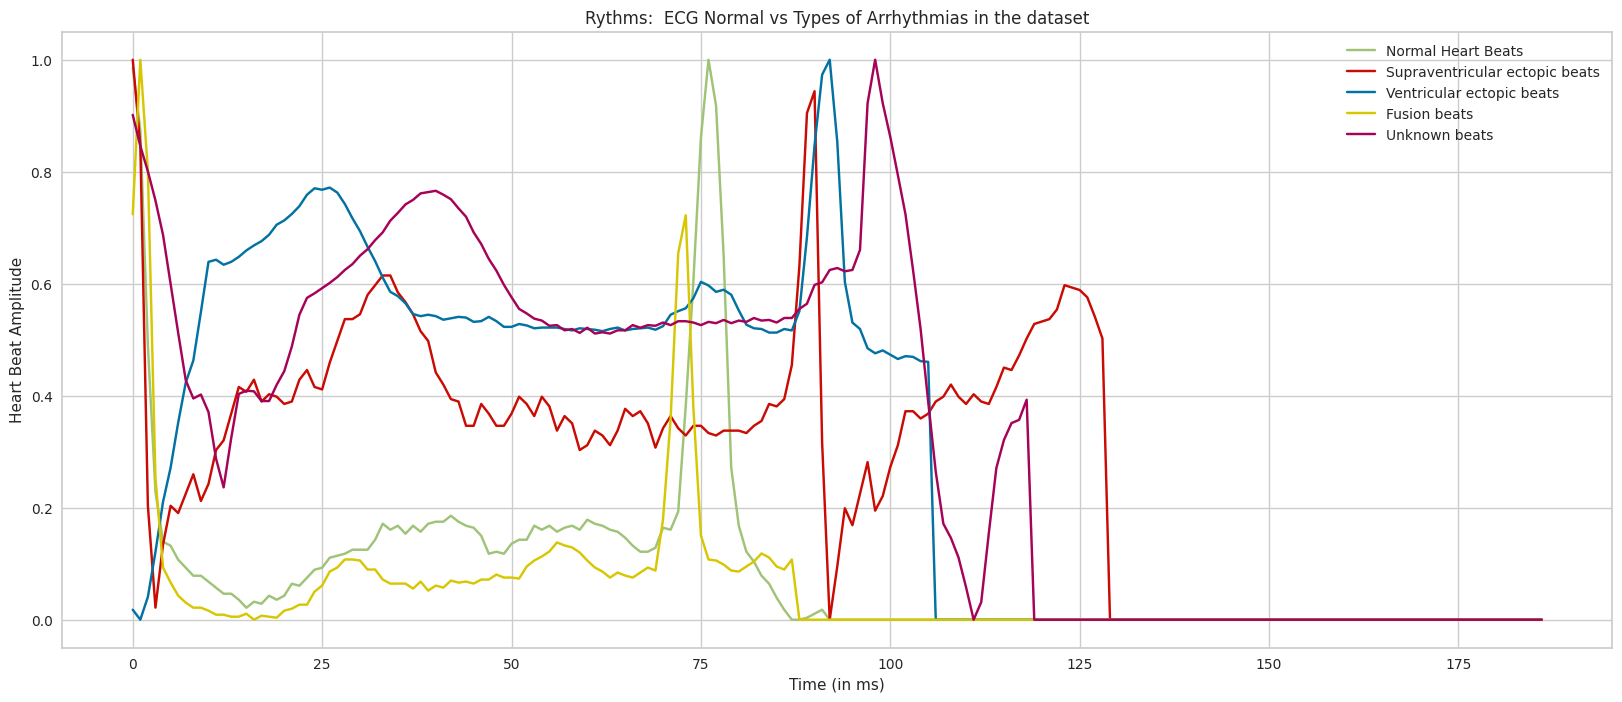

In [ ]:
#graficamos el último ejemplo de cada tipo de ritmo
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.plot(ritmo_n.iloc[-1, 0:187], color = 'g', label = 'Normal Heart Beats')
plt.plot(ritmo_s.iloc[-1, 0:187], color = 'r', label = 'Supraventricular ectopic beats')
plt.plot(ritmo_v.iloc[-1, 0:187], color = 'b', label = 'Ventricular ectopic beats')
plt.plot(ritmo_f.iloc[-1, 0:187], color = 'y', label = 'Fusion beats')
plt.plot(ritmo_q.iloc[-1, 0:187], color = 'm', label = 'Unknown beats')


plt.title("Rythms:  ECG Normal vs Types of Arrhythmias in the dataset", fontsize = 12)
plt.xlabel("Time (in ms)")
plt.ylabel("Heart Beat Amplitude")
plt.legend()
plt.show()

## Distribución de las Clases en el dataset

In [ ]:
datos=train_df

In [ ]:
# Crear un diccionario de mapeo de valores numéricos a títulos descriptivos
mapeo = {0: 'Normal Heart Beats',
         1: 'Supraventricular ectopic beats',
         2: 'Ventricular ectopic beats',
         3: 'Fusion beats',
         4: 'Unknown beats'}

# Reemplazar los valores numéricos en la columna 187 con los títulos descriptivos
datos[187] = datos[187].replace(mapeo)

Rows, Columns: (87554, 188)
187
Fusion beats                        641
Normal Heart Beats                72471
Supraventricular ectopic beats     2223
Unknown beats                      6431
Ventricular ectopic beats          5788
dtype: int64 ['Fusion beats' 'Normal Heart Beats' 'Supraventricular ectopic beats'
 'Unknown beats' 'Ventricular ectopic beats'] [  641 72471  2223  6431  5788]


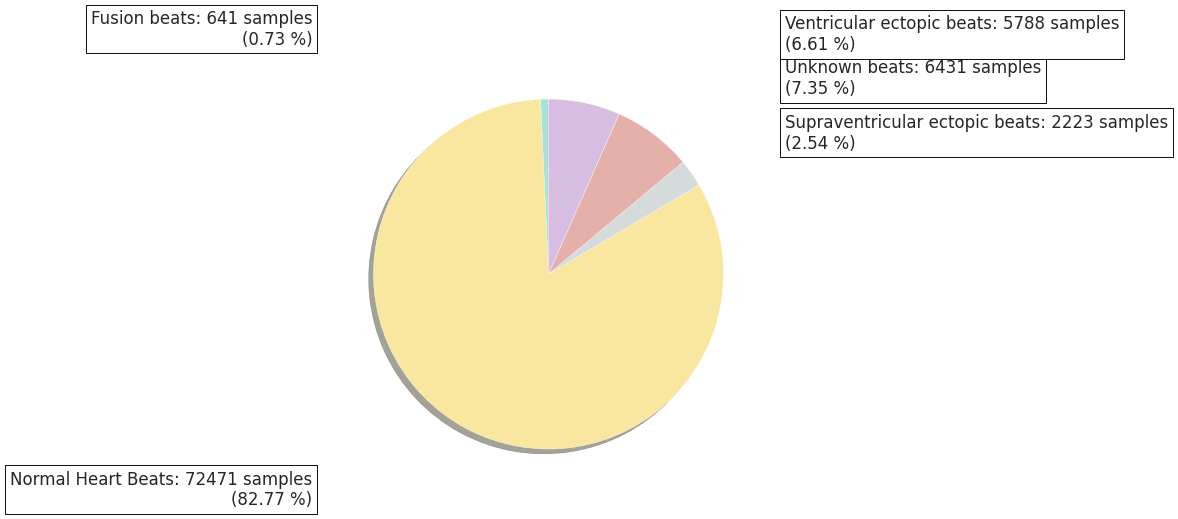

In [ ]:
print("Rows, Columns:",datos.shape)
Clases = datos.groupby([187]).size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['#A3E4D7','#F9E79F','#D5DBDB','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

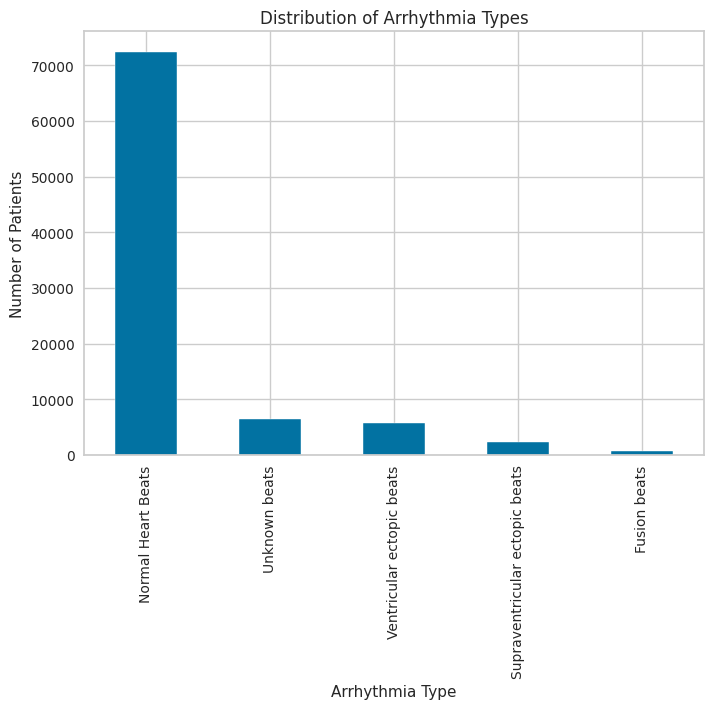

In [ ]:
# Crear el gráfico de barras con los títulos descriptivos en el eje x
datos[187].value_counts().plot(kind='bar')

# Agregar etiquetas y título al gráfico
plt.xlabel('Arrhythmia Type')
plt.ylabel('Number of Patients')
plt.title('Distribution of Arrhythmia Types')

# Mostrar el gráfico
plt.show()


## balancear clases (con sobremuestreo)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
# Separar variables independientes y etiquetas
X = datos.drop([187], axis=1)
y = datos[187]

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=[187])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over[187].value_counts())

Normal Heart Beats                72471
Fusion beats                      72471
Unknown beats                      6431
Ventricular ectopic beats          5788
Supraventricular ectopic beats     2223
Name: 187, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
# Separar variables independientes y etiquetas
X = datos_over.drop([187], axis=1)
y = datos_over[187]

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over2 = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=[187])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over2[187].value_counts())

Normal Heart Beats                72471
Supraventricular ectopic beats    72471
Fusion beats                      72471
Unknown beats                      6431
Ventricular ectopic beats          5788
Name: 187, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
# Separar variables independientes y etiquetas
X = datos_over2.drop([187], axis=1)
y = datos_over2[187]

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over3 = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=[187])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over3[187].value_counts())

Normal Heart Beats                72471
Supraventricular ectopic beats    72471
Ventricular ectopic beats         72471
Fusion beats                      72471
Unknown beats                      6431
Name: 187, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
# Separar variables independientes y etiquetas
X = datos_over3.drop([187], axis=1)
y = datos_over3[187]

# Sobremuestrear la clase minoritaria
oversampler = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las variables independientes y etiquetas sobremuestreadas
datos_over4 = pd.concat([pd.DataFrame(X_over), pd.DataFrame(y_over, columns=[187])], axis=1)

# Verificar que las clases estén balanceadas
print(datos_over4[187].value_counts())

Normal Heart Beats                72471
Supraventricular ectopic beats    72471
Ventricular ectopic beats         72471
Fusion beats                      72471
Unknown beats                     72471
Name: 187, dtype: int64


In [ ]:
datos=datos_over4

Rows, Columns: (362355, 188)
187
Fusion beats                      72471
Normal Heart Beats                72471
Supraventricular ectopic beats    72471
Unknown beats                     72471
Ventricular ectopic beats         72471
dtype: int64 ['Fusion beats' 'Normal Heart Beats' 'Supraventricular ectopic beats'
 'Unknown beats' 'Ventricular ectopic beats'] [72471 72471 72471 72471 72471]


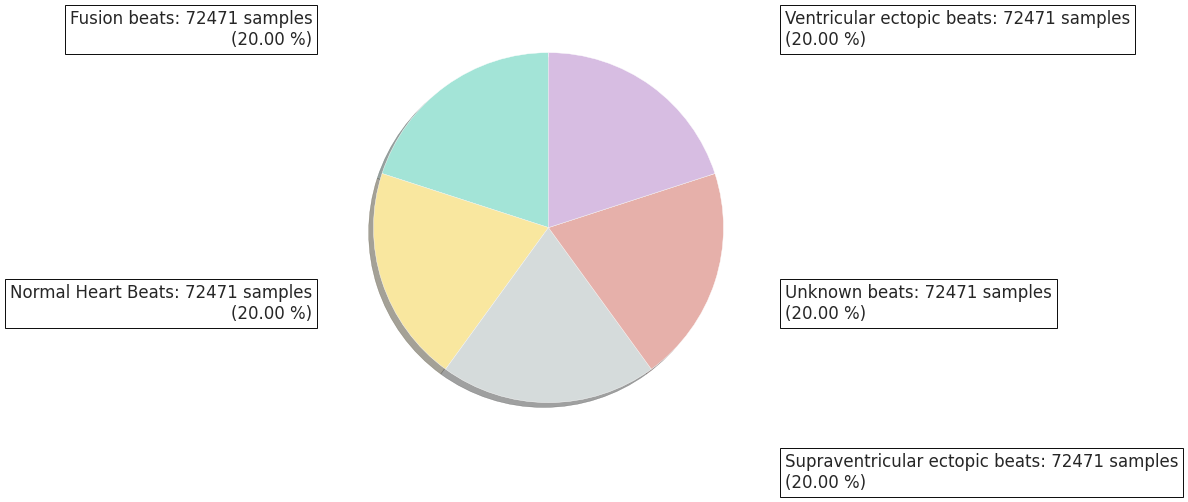

In [ ]:
print("Rows, Columns:",datos.shape)
Clases = datos.groupby([187]).size()
labels = Clases.index.values
sizes = Clases.values
print(Clases,labels,sizes)
muestra = []

for k in range(0,labels.size):
  texto = str(labels[k])+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)

colors = ['#A3E4D7','#F9E79F','#D5DBDB','#E6B0AA','#D7BDE2','#A9CCE3','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60','#A569BD','#C0392B','#138D75']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(10,5),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [ ]:
mapeo = {'Normal Heart Beats': 0,
         'Supraventricular ectopic beats': 1,
         'Ventricular ectopic beats': 2,
         'Fusion beats': 3,
         'Unknown beats': 4}

datos[187] = datos[187].replace(mapeo)
datos[187] = datos[187].astype(float)

#Redes neuronales prep

In [ ]:
train_df = datos

In [ ]:
from keras import layers
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3

from keras.callbacks import ReduceLROnPlateau , EarlyStopping
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
mit_train_data = train_df
#mit_train_data = df_tr

In [ ]:
mit_test_data = test_df

In [ ]:
print(mit_train_data.shape)
print(mit_test_data.shape)

(362355, 188)
(21892, 188)


In [ ]:
mit_train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train, y_train = mit_train_data.iloc[: , :-1], mit_train_data.iloc[: , -1]

In [ ]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
362350    4.0
362351    4.0
362352    4.0
362353    4.0
362354    4.0
Name: 187, Length: 362355, dtype: float64

In [ ]:
testX, testy = mit_test_data.iloc[: , :-1], mit_test_data.iloc[: , -1]

In [ ]:
y_train = to_categorical(y_train)
testy = to_categorical(testy)

In [ ]:
print("X shape=" +str(x_train.shape))
print("y shape=" +str(y_train.shape))

print("testX shape=" +str(testX.shape))
print("testy shape=" +str(testy.shape))

X shape=(362355, 187)
y shape=(362355, 5)
testX shape=(21892, 187)
testy shape=(21892, 5)


# DNN Model

## crear modelo (red neuronal profunda)


In [ ]:
ann_model = Sequential()
# CAPA ENTRADA
ann_model.add(Dense(64, activation='relu', input_shape=(187,)))

#CAPAS OCULTAS
ann_model.add(Dropout(0.2))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))

# CAPA SALIDA
ann_model.add(Dense(5, activation='softmax'))

## optimización del entrenamiento

In [ ]:

es = EarlyStopping(monitor="val_loss", # monitorea la pérdida en el conjunto de validación
 mode="min" # modo "min" para minimizar la pérdida
 , verbose=1 # indica como va el entrenamiento 
 , patience=5) # cant. de épocas en las que se puede tolerar que no mejore antes de detener el entrenamiento.

# ajustar dinámicamente la tasa de aprendizaje durante el entrenamiento
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', # monitorea la pérdida en el conjunto de validación
                                            patience=3, # cant. de épocas en las que se puede tolerar que no mejore en la precisión antes de detener el entrenamiento
                                            verbose=1, # indica como va el entrenamiento 
                                            factor=0.5, # reducir la tasa de aprendizaje en un factor de 0.5 cuando no hay mejora después de la paciencia
                                            min_lr=0.00001) # límite inferior para la tasa de aprendizaje

## compilar y ver el modelo

In [ ]:
# compilar el modelo
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# categorical_crossentropy --> Esta función de pérdida se usa para problemas de clasificación multiclase.


**Categorical Cross Entropy :**  $-\sum_{c=1}^My_{o,c}\log(p_{o,c})$

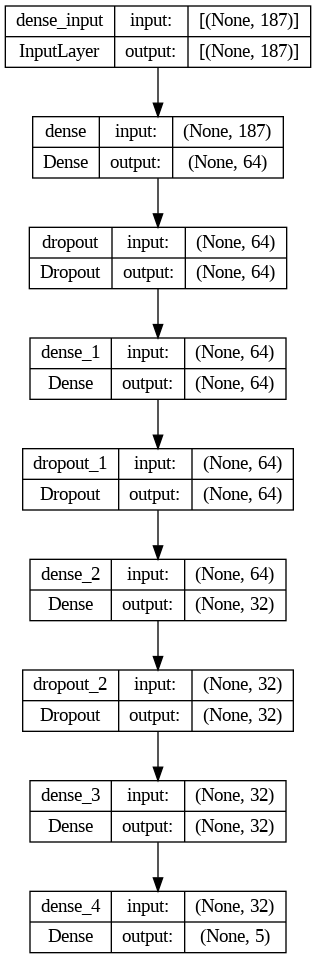

In [ ]:
# graficar modelo establecido de una dnn normal
tf.keras.utils.plot_model(ann_model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12032     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                1

## entrenamiento

In [ ]:
# Para minimizar la función de perdida aplicar GD en 128 lotes y hacerlo en 50 épocas
history = ann_model.fit(x_train, y_train,batch_size=128,
epochs=50,
verbose=1,
validation_data = (testX, testy),
callbacks = [learning_rate_reduction,es])

Epoch 1/50
2831/2831 [==============================] - 19s 4ms/step - loss: 0.4683 - accuracy: 0.8297 - val_loss: 0.3791 - val_accuracy: 0.8621 - lr: 0.0010
Epoch 2/50
2831/2831 [==============================] - 12s 4ms/step - loss: 0.2856 - accuracy: 0.8962 - val_loss: 0.2605 - val_accuracy: 0.9083 - lr: 0.0010
Epoch 3/50
2831/2831 [==============================] - 12s 4ms/step - loss: 0.2401 - accuracy: 0.9138 - val_loss: 0.3097 - val_accuracy: 0.8737 - lr: 0.0010
Epoch 4/50
2831/2831 [==============================] - 12s 4ms/step - loss: 0.2165 - accuracy: 0.9227 - val_loss: 0.2468 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 5/50
2831/2831 [==============================] - 12s 4ms/step - loss: 0.2045 - accuracy: 0.9267 - val_loss: 0.2345 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 6/50
2831/2831 [==============================] - 12s 4ms/step - loss: 0.1931 - accuracy: 0.9309 - val_loss: 0.2170 - val_accuracy: 0.9228 - lr: 0.0010
Epoch 7/50
2831/2831 [==============================

finaliza en la época 40 por early stopping para no conumir más recursos

## rendimiento del modelo (entrenamiento vs validación)

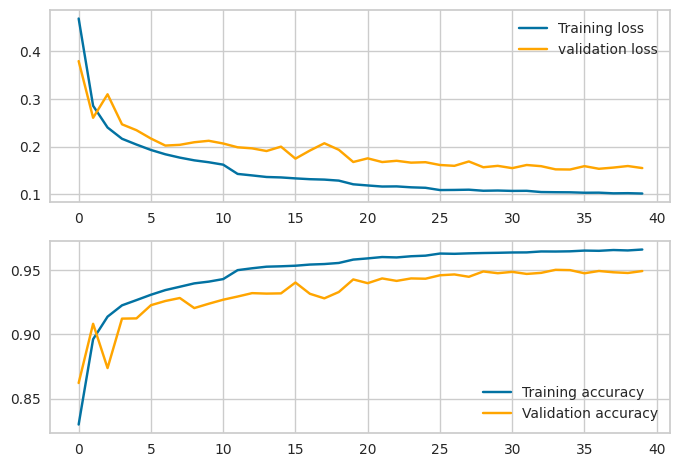

In [ ]:
# Graficar el cambio función de pérdida y precisión para el entrenamiento y la validación al aumentar las épocas 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
_, accuracy = ann_model.evaluate(testX, testy)
print('\n', 'Test accuracy:', accuracy, '\n')

685/685 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.9494

 Test accuracy: 0.9493879079818726 



685/685 [==============================] - 1s 2ms/step


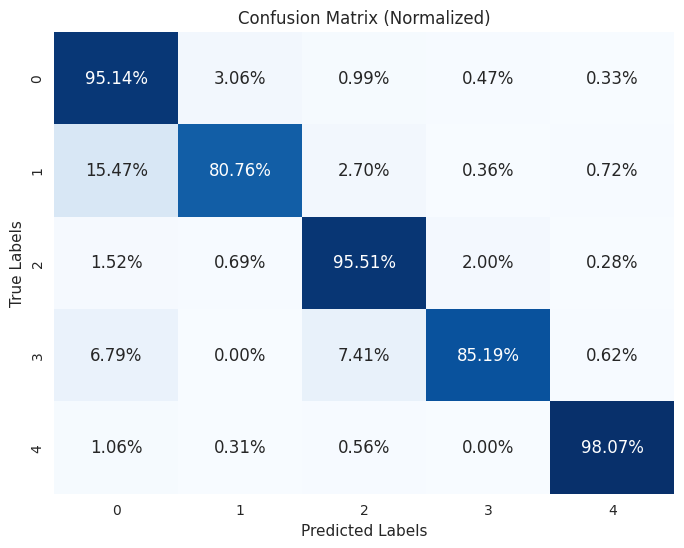

In [ ]:
# Obtener las predicciones del modelo para el conjunto de prueba
y_pred = ann_model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testy, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Calcular el número total de muestras en cada clase
num_samples_per_class = np.sum(cm, axis=1)

# Calcular la matriz de confusión normalizada por filas
cm_normalized = cm.astype('float') / num_samples_per_class[:, np.newaxis]

# Crear una visualización de la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Convertir las clases de los valores numéricos al formato de cadena
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Calcular el classification report y crear el DataFrame
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Convertir los valores en porcentaje
classification_df['support'] = classification_df['support'].astype(int)
classification_df.iloc[:, :-1] *= 100
classification_df.iloc[:, :-1] = classification_df.iloc[:, :-1].applymap('{:.2f}%'.format)

# Estilo para resaltar los valores
highlight = lambda x: ['background-color: lightgreen' if v == 'avg / total' else '' for v in x]
classification_df_styled = classification_df.style.apply(highlight, axis=1)

# Mostrar
display(classification_df_styled)

,precision,recall,f1-score,support
N,99.22%,95.14%,97.13%,18118
S,44.06%,80.76%,57.02%,556
V,86.49%,95.51%,90.78%,1448
F,54.12%,85.19%,66.19%,162
Q,95.81%,98.07%,96.93%,1608
accuracy,94.94%,94.94%,94.94%,0
macro avg,75.94%,90.93%,81.61%,21892
weighted avg,96.39%,94.94%,95.45%,21892



# Conv1D Model

## creación del modelo (Red neuronal convolucional)

In [ ]:
model = Sequential(name = "CNN1")
# CAPA DE ENTRADA 
model.add(Convolution1D(filters=32, kernel_size=5, strides=1 , input_shape=(187,1)))

#CONV1D + MAXPOOLING - con función de activación relu x5

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation='relu'))
model.add(Convolution1D(filters=32, kernel_size=5, strides=1, padding='same' , activation = 'relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))

# FLATTEN - o vectorización
model.add(Flatten())

#CAPAS FULLY CONNECTED

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))    #reducir overfitting (se apagan algunas neuronas)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# CAPA DE SALIDA
model.add(Dense(5, activation='softmax'))

In [ ]:
# resumen del modelo
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 183, 32)           192       
                                                                 
 conv1d_1 (Conv1D)           (None, 183, 32)           5152      
                                                                 
 conv1d_2 (Conv1D)           (None, 183, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 90, 32)           0         
 )                                                               
                                                                 
 conv1d_3 (Conv1D)           (None, 90, 32)            5152      
                                                                 
 conv1d_4 (Conv1D)           (None, 90, 32)            5152      
                                                              

## compilar y ver el modelo

In [ ]:
# METRICAS: función de pérdida (loss) 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


**Categorical Cross Entropy :**  $-\sum_{c=1}^My_{o,c}\log(p_{o,c})$

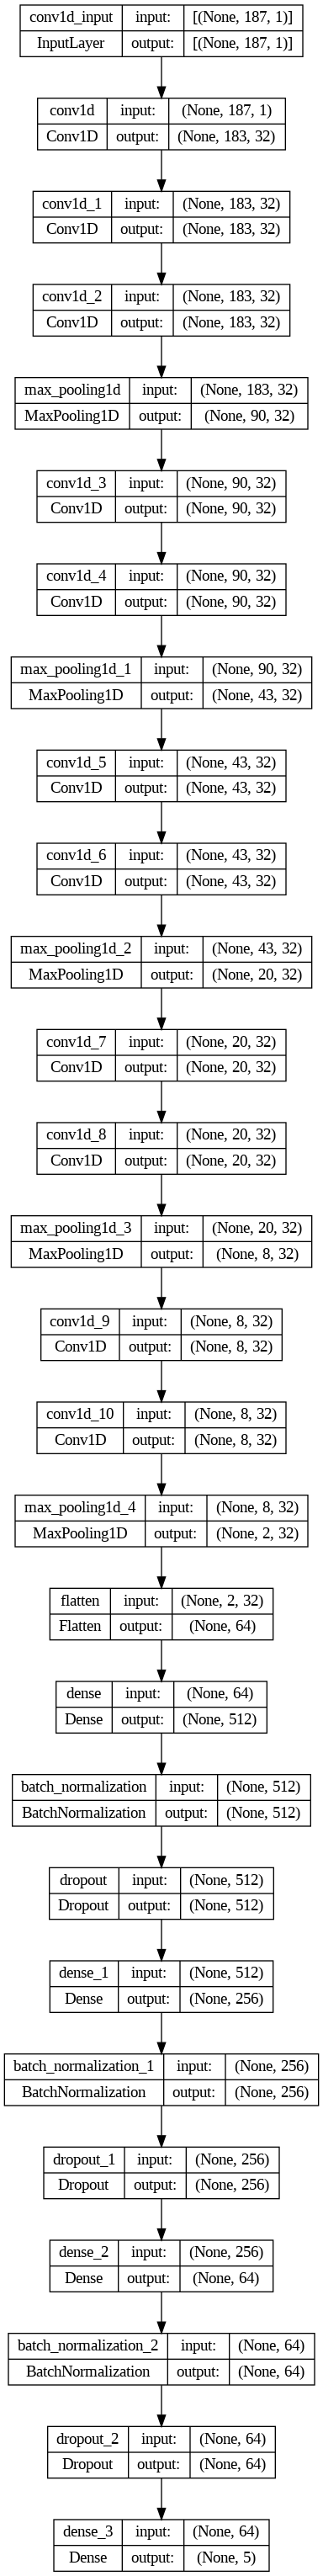

In [ ]:
#graficar arquitectura CNN
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

## optimización del entrenamiento

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

## entrenamiento

In [ ]:
history = model.fit(x_train, y_train,batch_size=128,
epochs=30,
verbose=1,
validation_data = (testX, testy),
callbacks = [learning_rate_reduction,es])

Epoch 1/30
2831/2831 [==============================] - 48s 13ms/step - loss: 0.2671 - accuracy: 0.9061 - val_loss: 0.2381 - val_accuracy: 0.9209 - lr: 0.0010
Epoch 2/30
2831/2831 [==============================] - 33s 12ms/step - loss: 0.0959 - accuracy: 0.9683 - val_loss: 0.0988 - val_accuracy: 0.9716 - lr: 0.0010
Epoch 3/30
2831/2831 [==============================] - 44s 16ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.0948 - val_accuracy: 0.9710 - lr: 0.0010
Epoch 4/30
2831/2831 [==============================] - 33s 12ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0916 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 5/30
2831/2831 [==============================] - 42s 15ms/step - loss: 0.0408 - accuracy: 0.9874 - val_loss: 0.0844 - val_accuracy: 0.9762 - lr: 0.0010
Epoch 6/30
2831/2831 [==============================] - 35s 13ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0779 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 7/30
2831/2831 [========================

## rendimiento del modelo (entrenamiento vs validación)

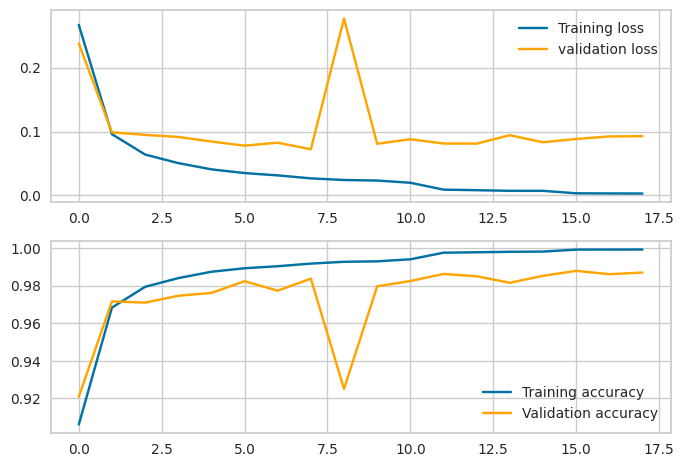

In [ ]:
# Graficar el cambio función de pérdida y precisión para el entrenamiento y la validación al aumentar las épocas 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
_, accuracy = model.evaluate(testX, testy)
print('\n', 'Test accuracy:', accuracy, '\n')

685/685 [==============================] - 3s 4ms/step - loss: 0.0928 - accuracy: 0.9870

 Test accuracy: 0.9869815707206726 



685/685 [==============================] - 2s 3ms/step


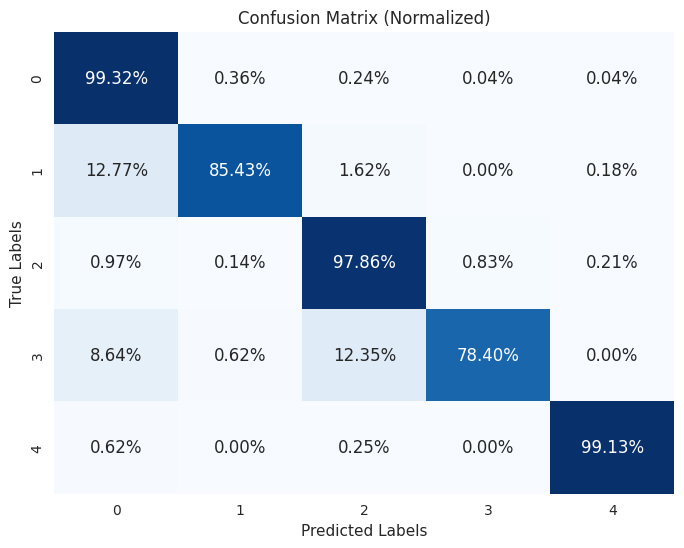

In [ ]:
# Obtener las predicciones del modelo para el conjunto de prueba
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testy, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Calcular el número total de muestras en cada clase
num_samples_per_class = np.sum(cm, axis=1)

# Calcular la matriz de confusión normalizada por filas
cm_normalized = cm.astype('float') / num_samples_per_class[:, np.newaxis]

# Crear una visualización de la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Convertir las clases de los valores numéricos al formato de cadena
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Calcular el classification report y crear el DataFrame
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Convertir los valores en porcentaje
classification_df['support'] = classification_df['support'].astype(int)
classification_df.iloc[:, :-1] *= 100
classification_df.iloc[:, :-1] = classification_df.iloc[:, :-1].applymap('{:.2f}%'.format)

# Estilo para resaltar los valores
highlight = lambda x: ['background-color: lightgreen' if v == 'avg / total' else '' for v in x]
classification_df_styled = classification_df.style.apply(highlight, axis=1)

# Mostrar
display(classification_df_styled)

,precision,recall,f1-score,support
N,99.40%,99.32%,99.36%,18118
S,87.32%,85.43%,86.36%,556
V,94.85%,97.86%,96.33%,1448
F,86.99%,78.40%,82.47%,162
Q,99.31%,99.13%,99.22%,1608
accuracy,98.70%,98.70%,98.70%,0
macro avg,93.57%,92.03%,92.75%,21892
weighted avg,98.69%,98.70%,98.69%,21892


# y si no balanceamos las clases al entrenar?

In [ ]:
map2 = {'Normal Heart Beats': 0,
         'Supraventricular ectopic beats': 1,
         'Ventricular ectopic beats': 2,
         'Fusion beats': 3,
         'Unknown beats': 4}

df_tr[187] = df_tr[187].replace(map2)
df_tr[187] = df_tr[187].astype(float)

In [ ]:
x_train, y_train = df_tr.iloc[: , :-1], df_tr.iloc[: , -1]

In [ ]:
y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: 187, Length: 87554, dtype: float64

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
print("X shape=" +str(x_train.shape))
print("y shape=" +str(y_train.shape))

print("testX shape=" +str(testX.shape))
print("testy shape=" +str(testy.shape))

X shape=(87554, 187)
y shape=(87554, 5)
testX shape=(21892, 187)
testy shape=(21892, 5)



## Conv1D Model again

### optimización del entrenamiento

In [ ]:
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### entrenamiento

In [ ]:
history = model.fit(x_train, y_train,batch_size=128,
epochs=30,
verbose=1,
validation_data = (testX, testy),
callbacks = [learning_rate_reduction,es])

Epoch 1/30
685/685 [==============================] - 30s 15ms/step - loss: 0.3411 - accuracy: 0.9093 - val_loss: 0.2594 - val_accuracy: 0.9269 - lr: 0.0010
Epoch 2/30
685/685 [==============================] - 9s 13ms/step - loss: 0.1490 - accuracy: 0.9608 - val_loss: 0.2130 - val_accuracy: 0.9505 - lr: 0.0010
Epoch 3/30
685/685 [==============================] - 9s 13ms/step - loss: 0.1866 - accuracy: 0.9519 - val_loss: 0.1665 - val_accuracy: 0.9555 - lr: 0.0010
Epoch 4/30
685/685 [==============================] - 10s 14ms/step - loss: 0.1204 - accuracy: 0.9686 - val_loss: 0.9211 - val_accuracy: 0.7220 - lr: 0.0010
Epoch 5/30
685/685 [==============================] - 10s 14ms/step - loss: 0.1804 - accuracy: 0.9523 - val_loss: 0.1452 - val_accuracy: 0.9611 - lr: 0.0010
Epoch 6/30
685/685 [==============================] - 9s 14ms/step - loss: 0.1183 - accuracy: 0.9677 - val_loss: 2.2426 - val_accuracy: 0.2375 - lr: 0.0010
Epoch 7/30
685/685 [==============================] - 10s 14m

### rendimiento del modelo (entrenamiento vs validación)

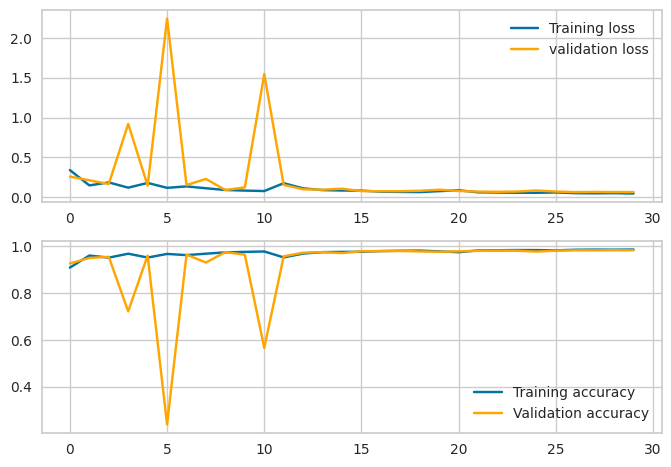

In [ ]:
# Graficar el cambio función de pérdida y precisión para el entrenamiento y la validación al aumentar las épocas 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
_, accuracy = model.evaluate(testX, testy)
print('\n', 'Test accuracy:', accuracy, '\n')

685/685 [==============================] - 4s 5ms/step - loss: 0.0654 - accuracy: 0.9832

 Test accuracy: 0.9832358956336975 



685/685 [==============================] - 2s 3ms/step


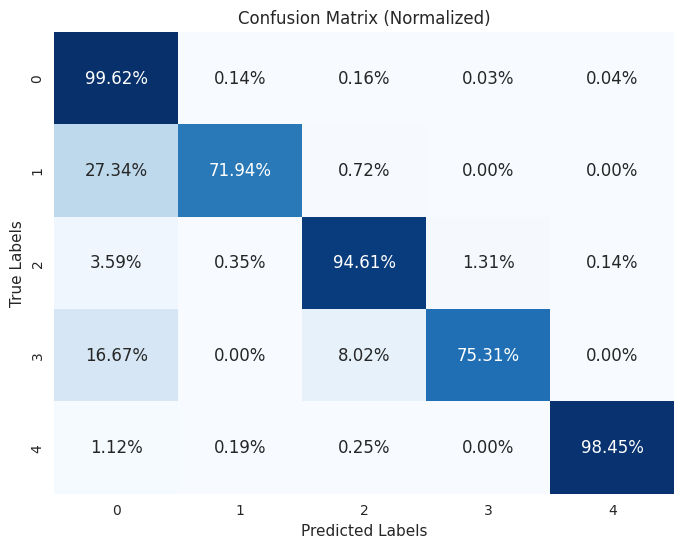

In [ ]:
# Obtener las predicciones del modelo para el conjunto de prueba
y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(testy, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)

# Calcular el número total de muestras en cada clase
num_samples_per_class = np.sum(cm, axis=1)

# Calcular la matriz de confusión normalizada por filas
cm_normalized = cm.astype('float') / num_samples_per_class[:, np.newaxis]

# Crear una visualización de la matriz de confusión normalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Convertir las clases de los valores numéricos al formato de cadena
class_labels = ['N', 'S', 'V', 'F', 'Q']

# Calcular el classification report y crear el DataFrame
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_labels, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Convertir los valores en porcentaje
classification_df['support'] = classification_df['support'].astype(int)
classification_df.iloc[:, :-1] *= 100
classification_df.iloc[:, :-1] = classification_df.iloc[:, :-1].applymap('{:.2f}%'.format)

# Estilo para resaltar los valores
highlight = lambda x: ['background-color: lightgreen' if v == 'avg / total' else '' for v in x]
classification_df_styled = classification_df.style.apply(highlight, axis=1)

# Mostrar
display(classification_df_styled)

,precision,recall,f1-score,support
N,98.64%,99.62%,99.13%,18118
S,92.17%,71.94%,80.81%,556
V,96.48%,94.61%,95.54%,1448
F,83.56%,75.31%,79.22%,162
Q,99.37%,98.45%,98.91%,1608
accuracy,98.32%,98.32%,98.32%,0
macro avg,94.04%,87.99%,90.72%,21892
weighted avg,98.27%,98.32%,98.26%,21892
